# Periodic Signals

Examples of Periodic Signals

- Tides (time)
- Planetary Motion (time)
- Earthquakes (time)
- Plate Motions (time or space)
- Faulting (Space)
- JPEG / MPEG / AAC / Netflix
- Compression
- ...

## Extracting Information out of the signals

How do we isolate signals we see in a consistent / quantitative way?

### Burte Force / Silly way

Assume a periodicity ,$T$, of a signal $s_0(x)$, i.e. a sine wave (or cosine) $f(x,T,A) = A \sin(2\pi x/T )$ and fit this to the data.

Then we remove this assumed signal from the data 

$$s_1(x) = s_0(x) - f(x,T_0,A_0) $$

and pick the next most dominant period, $T_2$, fit that to the data and remove it.

$$s_2(x) = s_1(x) - f(x,T_1,A_1) $$

$$s_1(x) = s_0(x) - f(x,T_0,A_0) - f(x,T_1,A_1)$$

Given enough $f_i(x,T_i,A_i)$ eventaully we will be left with a signal of nothing, $s_\infty(x) = 0$.

Or, another way to think about this is as a [Fourier Series](https://en.wikipedia.org/wiki/Fourier_series), from [Joseph Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier), which can be written as 

$$ s_N(x) = \dfrac{a_0}{2} + \sum_{n=1}^{N} a_n \sin\left(\dfrac{2\pi n x}{T} + \phi_n \right)$$

where $N \ge 1$, $a_n$ are the amplitude and $\phi_n$ is the phase of the sine wave.

It can also be written in with $\sin$ and $\cos$ terms or with an exponential $e^{ix}$

$$s_N(x) = \sum_{n=-N}^{N} c_n e^{\dfrac{2\pi i n x}{T}} $$

### Example of constructing a signal

Square Wave

In [1]:
import matplotlib.pyplot as plt
import numpy as np

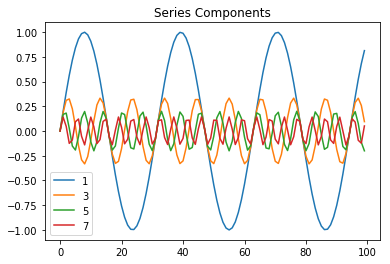

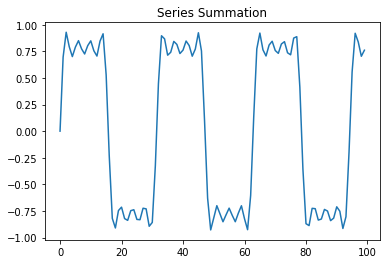

In [2]:
phi = np.array([0,0,0,0,0,0])
ns = 4    # Number of Sine Waves (Terms)
nx = 100  # Length of x axis
T  = 10   # Nominal (Fundamental) Period
n  = np.arange(1,2*ns+1,2)
A  = np.ones(n.shape) / n
x  = np.arange(0,nx)     # Time Vector
S  = np.zeros((ns, nx))  # Sine Waves (Preallocated)

for i in range(ns):
    S[i,:] = A[i] * np.sin(2 * x * n[i]/T) 
    plt.plot(x,S[i,:], label=n[i])
plt.title("Series Components")
plt.legend()    
    
plt.figure()
plt.plot(x, np.sum(S,axis=0))

plt.title("Series Summation");

In [3]:
from scipy import signal

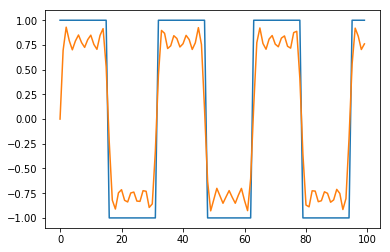

In [4]:
sq = signal.square(x/5)
plt.plot(x,sq)
plt.plot(x,np.sum(S,axis=0))

# Fourier Transform

The [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform) sometimes just referred to as the [FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform) is written as 

$$ F(x) = \int_{-\infty}^{+\infty} f(x) e^{-2\pi i x k} dk $$

and the inverse transform is

$$ f(x) = \int_{-\infty}^{+\infty} F(x) e^{2\pi i x k} dk $$

where the only difference is the sign of the $e^{ix}$ function in the integrand.  

If you exchange the $\int$ with a $\sum$ and convert the $e^{ix} = \cos{x} + i \sin{x}$, you can get back to the fourier series.

## What you need to know
 - Easly convert between time and [frequency](https://en.wikipedia.org/wiki/Frequency)
 - Convert between space and [wavenumber](https://en.wikipedia.org/wiki/Wavenumber)
 - Certain operations are easier in the frequency domain (or faster)
     - [Convolution](https://en.wikipedia.org/wiki/Convolution)
     - [Correlation](https://en.wikipedia.org/wiki/Cross-correlation)

### Digital Signals
- Representation of Analog signals (Digitized)
- Can only represent freuqneyc at $0.5 f_s$ where $f_s$ is the sampling frequency

In [5]:
def fft_fig(x,y):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(x,y)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.subplot(1,2,2)
    Z = np.fft.fft(y)
    f = np.fft.fftfreq(x.shape[-1],d=x[1]-x[0])
    n2 = f.shape[-1]//2
    plt.loglog(f[:n2],np.abs(Z[:n2]))
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")

# Simple Signals

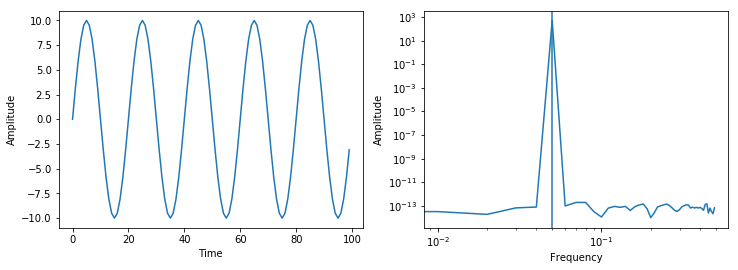

In [6]:
x = np.arange(100.0)
T = 20.0
y = 10.0 * np.sin(2 * np.pi * x / T)
fft_fig(x,y)
plt.axvline(1/T)

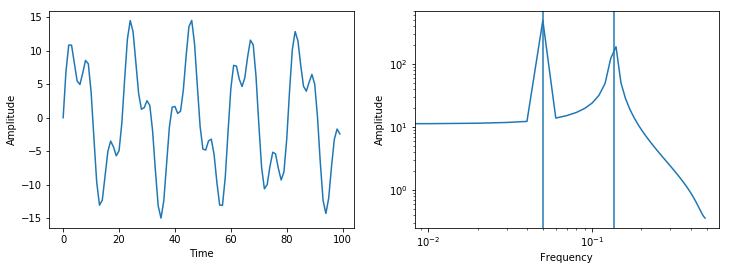

In [7]:
x = np.arange(100.0)
T1,T2 = 20.0, 7.345
y1 = 10.0 * np.sin(2 * np.pi * x / T1) 
y2 = 5.0 * np.sin(2 * np.pi * x / T2)
fft_fig(x,y1+y2)
plt.axvline(1/T1)
plt.axvline(1/T2)

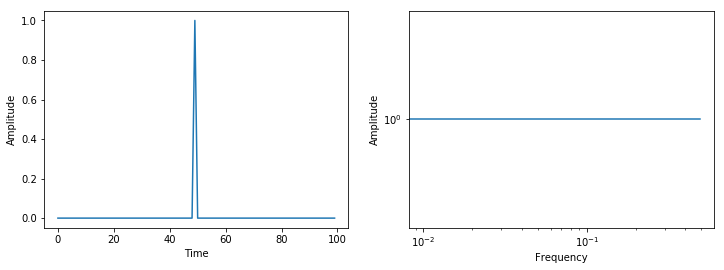

In [8]:
x = np.arange(100.0)
y = np.zeros(x.shape)
y[49] = 1.0
fft_fig(x,y)

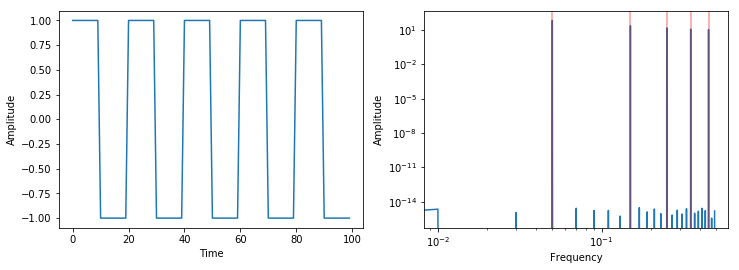

In [9]:
x = np.arange(100.0)
y = signal.square(2 * np.pi * x / 20)
fft_fig(x,y)
for i in np.arange(1,10,2):
    plt.axvline(i/20.,color='red',alpha=0.4)  # Components as before

# Tide Gauge Data

In [10]:
data = np.loadtxt("tide_newport_short.txt")

In [11]:
!head -5 tide_newport_short.txt

# time(seconds) water_level(ft)
         0   1.64000000
       360   1.43300000
       720   1.32200000
      1080   1.30200000


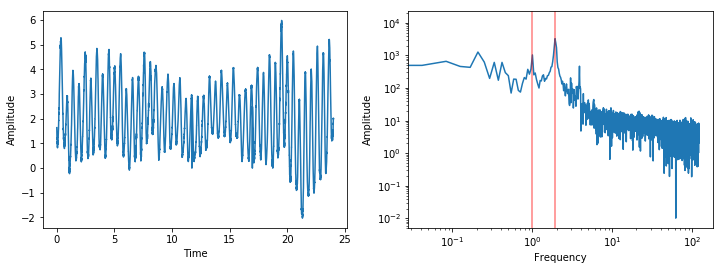

In [12]:
fft_fig(data[:,0]/(60*60*24),data[:,1])

T = 12.5 / 24 # Period in Days
plt.axvline(1.0/T,color='red',alpha=0.5)
T = 24.0/ 24 # Period in Days
plt.axvline(1.0/T,color='red',alpha=0.5)

# Earthquake Data

In [13]:
!head -22 BK.CMB.00.BHZ.2011.070.05.46.00.000-2011.070.07.46.00.000.csv  | tail -5

# field_type: datetime, INTEGER
Time, Sample
2011-03-11T05:46:00.019534Z, -7464
2011-03-11T05:46:00.044534Z, -7459
2011-03-11T05:46:00.069534Z, -7394


In [14]:
dt = 0.025
y = np.loadtxt("BK.CMB.00.BHZ.2011.070.05.46.00.000-2011.070.07.46.00.000.csv",usecols=1,skiprows=19)
x = np.arange(y.shape[-1]) * dt

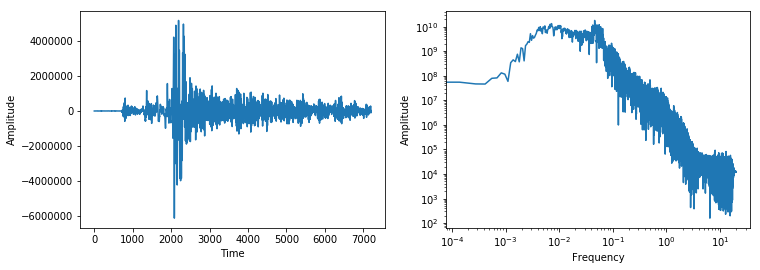

In [15]:
fft_fig(x,y)

# 2D Data

FFT can be used to look at 2D data where the components are in orthogonal directions (a 2D Image) or when the data leans towards a circular coordinate system.

### Truly 2D data (Images)

For image data (topography, bathymetry, pictures of [kitten, bright copper kettles, and warm woolen mittens](https://en.wikipedia.org/wiki/My_Favorite_Things_(song)) use the [2D FFT](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft2.html)

### Circular Coordinate system data 

For this other types, typically things that rotate, cast the (x,y) data into a circular coordinate system and use the regular old [FFT](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html)

Casting the data into a circular coordinate system is as simple as using a complex number

$$ z = x + i y $$

The FFT of a complex number returns complex components, well, actually FFT of any series will return a complex number which you can then turn into a amplitude and phase

```python
amplitude = np.abs(z)
phase     = np.angle(z)
```